<span style="font-size: 36px;">Task 3.1</span>

In [3]:
import pandas as pd
import numpy as np

# Load the dataset from the file (replace with your actual path)
data = pd.read_csv('C:/Users/User/Desktop/10/data-2/Week2_challenge_data_source(CSV).csv')

# Handling missing values by replacing them with mean or mode
data['TCP DL Retrans. Vol (Bytes)'] = data['TCP DL Retrans. Vol (Bytes)'].fillna(data['TCP DL Retrans. Vol (Bytes)'].mean())
data['TCP UL Retrans. Vol (Bytes)'] = data['TCP UL Retrans. Vol (Bytes)'].fillna(data['TCP UL Retrans. Vol (Bytes)'].mean())
data['Avg RTT DL (ms)'] = data['Avg RTT DL (ms)'].fillna(data['Avg RTT DL (ms)'].mean())
data['Avg RTT UL (ms)'] = data['Avg RTT UL (ms)'].fillna(data['Avg RTT UL (ms)'].mean())
data['Avg Bearer TP DL (kbps)'] = data['Avg Bearer TP DL (kbps)'].fillna(data['Avg Bearer TP DL (kbps)'].mean())
data['Avg Bearer TP UL (kbps)'] = data['Avg Bearer TP UL (kbps)'].fillna(data['Avg Bearer TP UL (kbps)'].mean())
data['Handset Type'] = data['Handset Type'].fillna(data['Handset Type'].mode()[0])

# Combine the retransmission, RTT, and throughput values for downstream and upstream
data['TCP_retransmission'] = data[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']].mean(axis=1)
data['RTT'] = data[['Avg RTT DL (ms)', 'Avg RTT UL (ms)']].mean(axis=1)
data['throughput'] = data[['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']].mean(axis=1)

# Remove outliers using the mean and standard deviation method
for col in ['TCP_retransmission', 'RTT', 'throughput']:
    mean = data[col].mean()
    std_dev = data[col].std()
    data[col] = np.where(
        (data[col] < mean - 3 * std_dev) | (data[col] > mean + 3 * std_dev),
        mean,
        data[col]
    )

# Aggregate per customer
customer_agg = data.groupby('MSISDN/Number').agg({
    'TCP_retransmission': 'mean',
    'RTT': 'mean',
    'Handset Type': lambda x: x.mode()[0],
    'throughput': 'mean'
}).reset_index()

# Save the aggregated data to a new CSV file
customer_agg.to_csv('customer_aggregated_data.csv', index=False)

print("Aggregation complete. Data saved to 'customer_aggregated_data.csv'.")


Aggregation complete. Data saved to 'customer_aggregated_data.csv'.


<span style="font-size: 36px;">Task 3.2</span>

In [5]:
# Compute and list top 10, bottom 10, and most frequent values
def compute_top_bottom_frequent(column):
    top_10 = column.sort_values(ascending=False).head(10)
    bottom_10 = column.sort_values().head(10)
    most_frequent = column.mode().head(10)
    return top_10, bottom_10, most_frequent

# Compute top, bottom, and most frequent values for TCP retransmission, RTT, and throughput
tcp_top_10, tcp_bottom_10, tcp_most_frequent = compute_top_bottom_frequent(data['TCP_retransmission'])
rtt_top_10, rtt_bottom_10, rtt_most_frequent = compute_top_bottom_frequent(data['RTT'])
throughput_top_10, throughput_bottom_10, throughput_most_frequent = compute_top_bottom_frequent(data['throughput'])

# Display the results
print("\nTop 10 TCP retransmission values:")
print(tcp_top_10)
print("\nBottom 10 TCP retransmission values:")
print(tcp_bottom_10)
print("\nMost Frequent TCP retransmission values:")
print(tcp_most_frequent)

print("\nTop 10 RTT values:")
print(rtt_top_10)
print("\nBottom 10 RTT values:")
print(rtt_bottom_10)
print("\nMost Frequent RTT values:")
print(rtt_most_frequent)

print("\nTop 10 Throughput values:")
print(throughput_top_10)
print("\nBottom 10 Throughput values:")
print(throughput_bottom_10)
print("\nMost Frequent Throughput values:")
print(throughput_most_frequent)


Top 10 TCP retransmission values:
93480     1.881256e+08
116465    1.880997e+08
97421     1.877638e+08
85773     1.874938e+08
115659    1.871944e+08
121394    1.862100e+08
121428    1.861376e+08
61577     1.852103e+08
79891     1.849796e+08
17637     1.843837e+08
Name: TCP_retransmission, dtype: float64

Bottom 10 TCP retransmission values:
143594    43.0
111100    48.5
18417     53.0
13142     54.0
97061     56.5
8794      64.0
99947     64.5
95955     67.0
83214     67.0
12849     71.5
Name: TCP_retransmission, dtype: float64

Most Frequent TCP retransmission values:
0    1.078479e+07
Name: TCP_retransmission, dtype: float64

Top 10 RTT values:
92388     909.0
135362    908.0
24273     907.0
50357     906.5
133602    904.5
145025    904.5
19571     904.0
117178    904.0
22397     902.5
110690    900.0
Name: RTT, dtype: float64

Bottom 10 RTT values:
143878    0.0
103321    0.0
124538    0.0
42602     0.0
71738     1.0
144923    2.0
50966     2.0
103544    2.5
123210    3.0
8756     

<span style="font-size: 36px;">Task 3.3</span>

Distribution of average throughput per handset type:
Handset Type
A-Link Telecom I. Cubot A5                                                             11755.000000
A-Link Telecom I. Cubot Note Plus                                                       3349.500000
A-Link Telecom I. Cubot Note S                                                          4468.500000
A-Link Telecom I. Cubot Nova                                                           28108.500000
A-Link Telecom I. Cubot Power                                                          34734.000000
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809       29.000000
Zyxel Communicat. Lte7460                                                              30978.000000
Zyxel Communicat. Sbg3600                                                               7535.237287
Zyxel Communicat. Zyxel Wah7706   

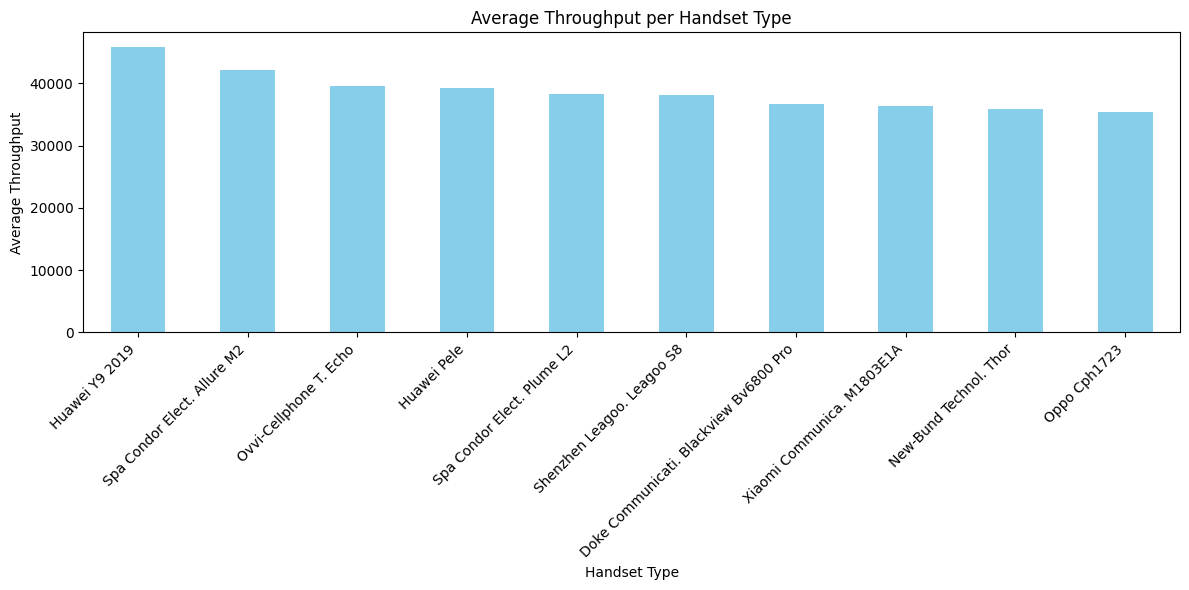

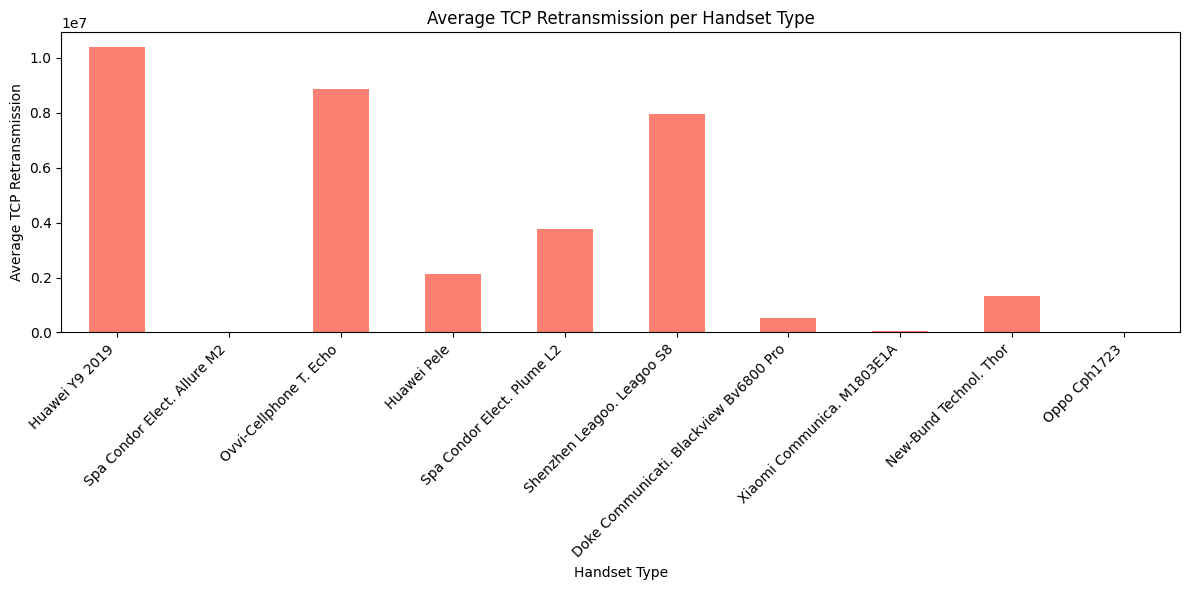


Interpretation:
1. Distribution of average throughput per handset type shows the handset models with the highest and lowest average throughput.
2. Average TCP retransmission per handset type highlights which handset models have more network issues.


In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Distribution of average throughput per handset type
throughput_distribution = customer_agg.groupby('Handset Type')['throughput'].mean()

# Average TCP retransmission per handset type
tcp_retransmission_avg = customer_agg.groupby('Handset Type')['TCP_retransmission'].mean()

print("Distribution of average throughput per handset type:")
print(throughput_distribution)

print("Average TCP retransmission per handset type:")
print(tcp_retransmission_avg)

top_n = 10

# Filter top N handset types for visualization
top_handsets = throughput_distribution.nlargest(top_n).index
throughput_distribution = throughput_distribution[top_handsets]
tcp_retransmission_avg = tcp_retransmission_avg[top_handsets]

# Plot throughput distribution
plt.figure(figsize=(12, 6))
throughput_distribution.plot(kind='bar', color='skyblue')
plt.title('Average Throughput per Handset Type')
plt.xlabel('Handset Type')
plt.ylabel('Average Throughput')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot TCP retransmission average
plt.figure(figsize=(12, 6))
tcp_retransmission_avg.plot(kind='bar', color='salmon')
plt.title('Average TCP Retransmission per Handset Type')
plt.xlabel('Handset Type')
plt.ylabel('Average TCP Retransmission')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("1. Distribution of average throughput per handset type shows the handset models with the highest and lowest average throughput.")
print("2. Average TCP retransmission per handset type highlights which handset models have more network issues.")
